*Made By [Adnan](https://linktr.ee/adnaaaen)*

# ***Exploratory Data Analysis***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import os

plt.style.use("dark_background")
filterwarnings("ignore")

In [2]:
if not os.path.exists("../data/cleaned/cleaned.csv"):
    raise Exception("your need to download dataset, visit data/ folder in the root")

df = pd.read_csv("../data/cleaned/cleaned.csv", parse_dates=["datetime"])
df.head()

,city,datetime,pm2.5,pm10,no,no2,n_ox,nh3,co,so2,o3,benzene,toluene,aqi
0,Ahmedabad,2015-01-29 09:00:00,4.400235,4.532815,0.883768,3.131137,3.075005,2.824944,0.883768,3.504355,3.865141,0.0,0.0,5.666427
1,Ahmedabad,2015-01-29 10:00:00,4.486387,4.532815,1.108563,3.038313,3.145014,2.824944,1.108563,4.381401,3.130263,0.0,0.0,5.204007
2,Ahmedabad,2015-01-29 11:00:00,4.516667,4.532815,1.000632,3.049747,3.140698,2.824944,1.000632,4.573267,4.229312,0.0,0.0,5.209486
3,Ahmedabad,2015-01-29 12:00:00,4.437107,4.532815,0.559616,2.853593,2.861057,2.824944,0.559616,3.826683,4.498920,0.0,0.0,5.209486
4,Ahmedabad,2015-01-29 13:00:00,4.239887,4.532815,0.457425,2.689886,2.602690,2.824944,0.457425,3.571503,4.768564,0.0,0.0,5.192957


In [3]:
numerical_variables = df.select_dtypes(np.number).drop(columns=["aqi"])
categorical_variables = df.select_dtypes("O")

In [25]:
df["aqi"].agg(["min", "max", "mean"])

min     2.197225
max     8.050065
mean    4.864317
Name: aqi, dtype: float64

In [34]:
df.groupby(df["datetime"].dt.year)[["aqi"]].max()

,aqi
datetime,
2015,7.585281
2016,7.898782
2017,8.050065
2018,8.043021
2019,8.006701
2020,7.909489


In [26]:
df.groupby(df["datetime"].dt.weekday)[["aqi"]].max()

,aqi
datetime,
0,8.050065
1,8.034307
2,7.996317
3,8.007034
4,8.005367
5,8.043021
6,8.043021


### ***Target Varibale Distribution***

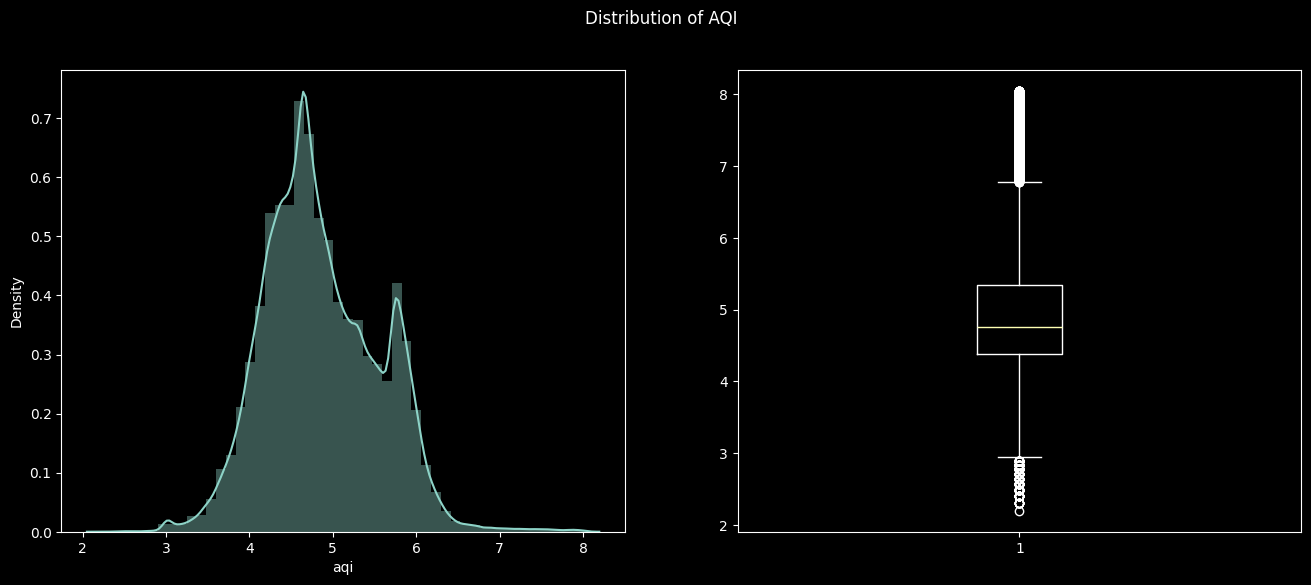

In [4]:
plt.figure(figsize=(16, 6))
plt.suptitle("Distribution of AQI")
plt.subplot(1, 2, 1)
sns.distplot(df["aqi"])

plt.subplot(1, 2, 2)
plt.boxplot(df["aqi"])

plt.show()

## ***Uni-Variate Analysis***

### ***Numerical Varibale Analysis***

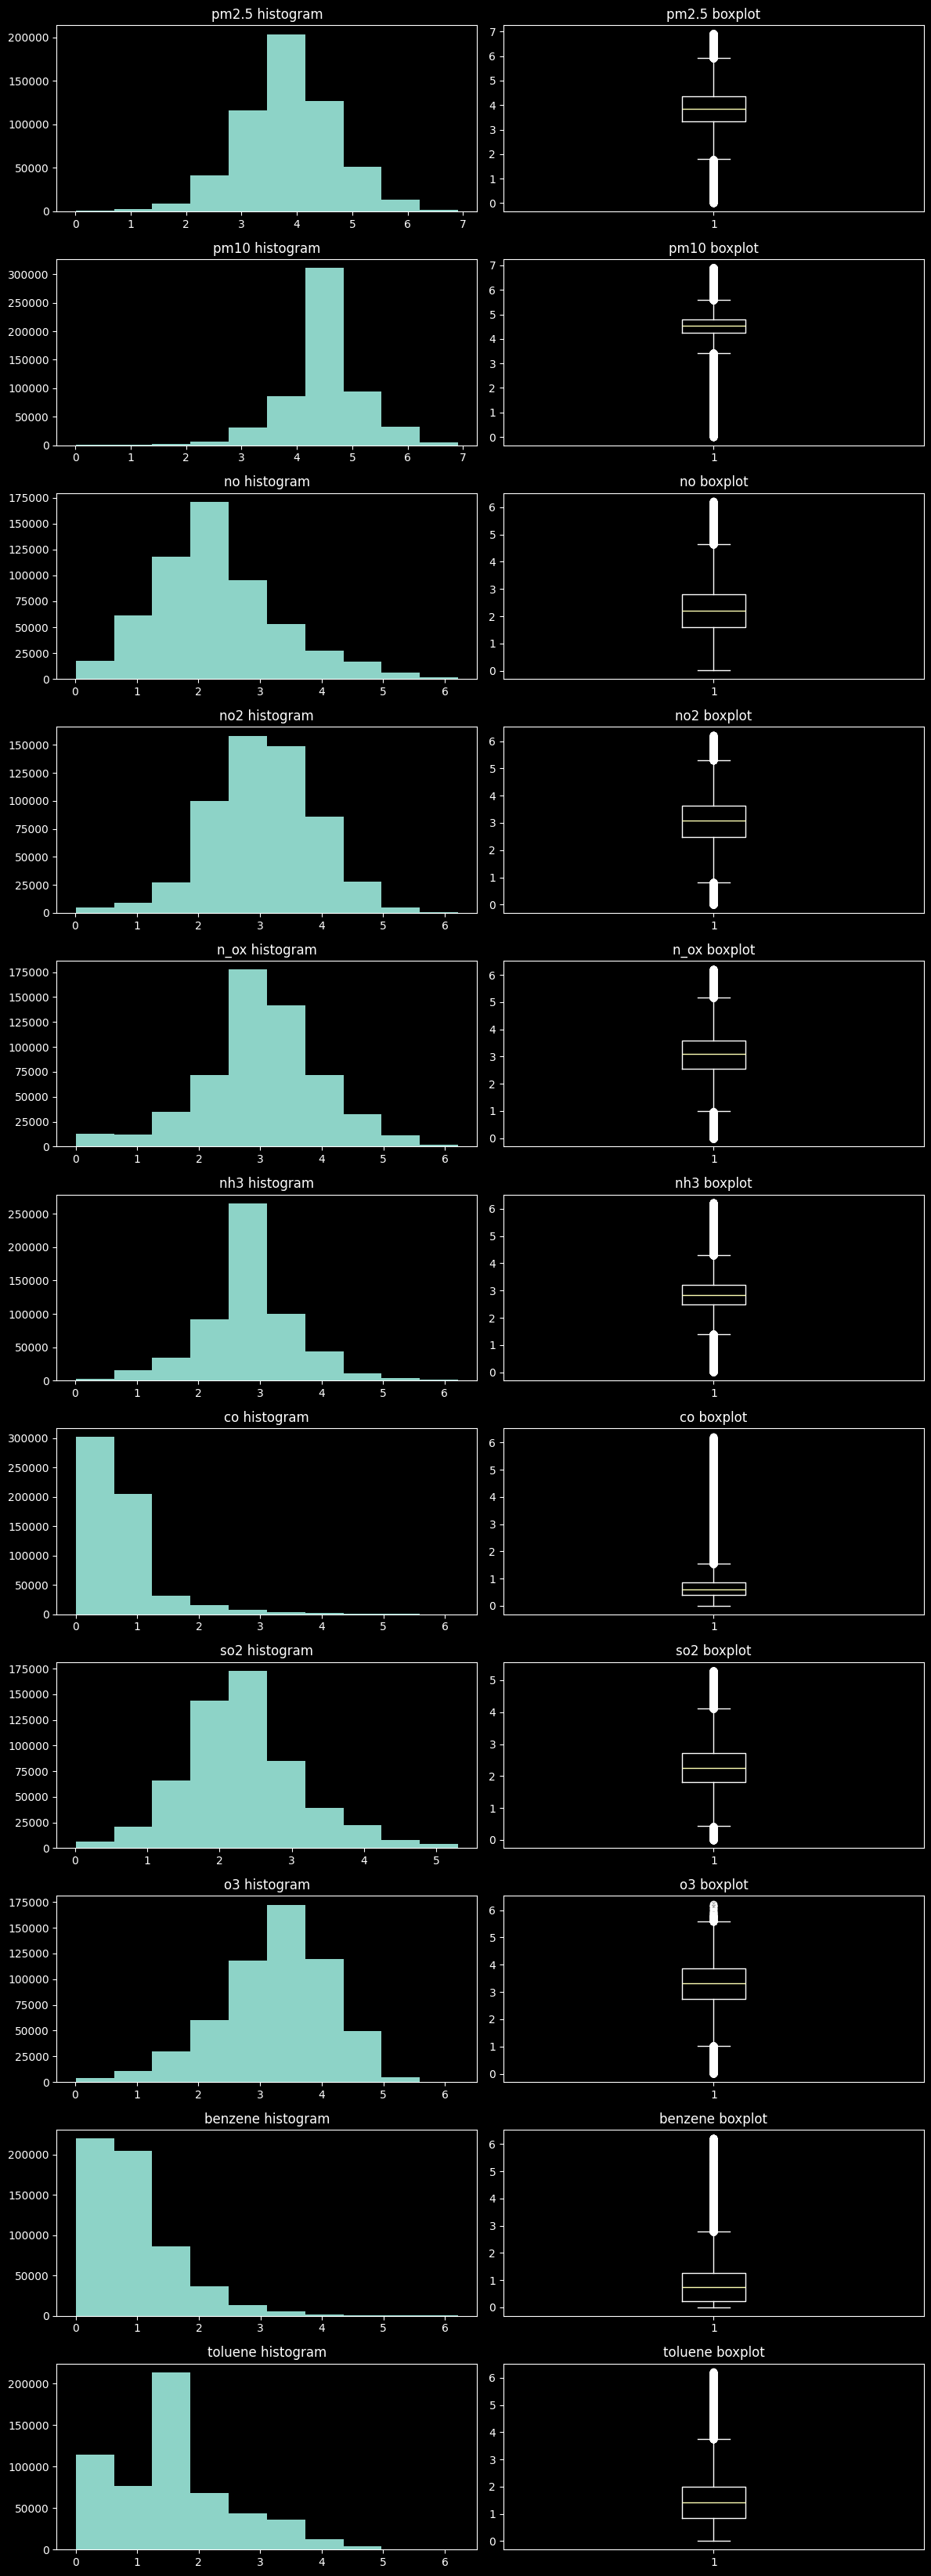

In [5]:
_, ax = plt.subplots(
    len(numerical_variables.columns),
    2,
    figsize=(12, 3 * len(numerical_variables.columns)),
)

for i, column in enumerate(numerical_variables.columns):
    ax[i, 0].set_title(f"{column} histogram")
    ax[i, 0].hist(df[column])

    ax[i, 1].set_title(f"{column} boxplot")
    ax[i, 1].boxplot(df[column])
plt.tight_layout()
plt.show()

### ***Categorical Variable Analysis***

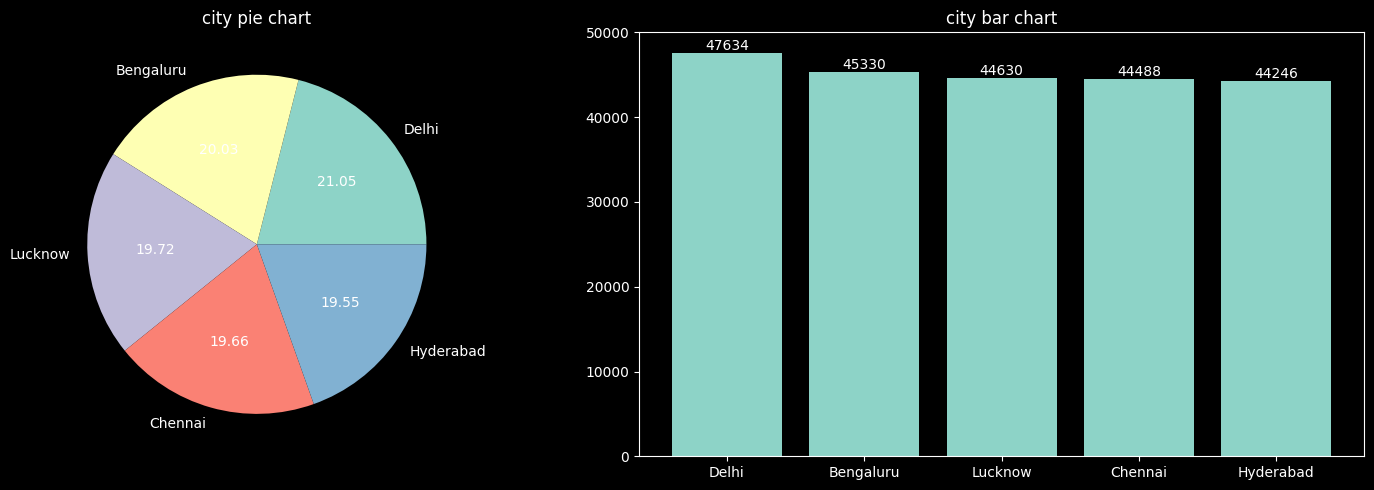

In [7]:
plt.figure(figsize=(15, 5 * len(categorical_variables.columns)))

plt.subplot(1,2, 1)
plt.title("city pie chart")
plt.pie(
    x=df["city"].value_counts().nlargest(n=5).values,
    labels=df["city"].value_counts().nlargest(n=5).index,
    autopct="%.2f",
)

plt.subplot(1,2, 2)
plt.title("city bar chart")
lab = plt.bar(
    height=df["city"].value_counts().nlargest(n=5).values,
    x=df["city"].value_counts().nlargest(n=5).index,
)
plt.bar_label(lab)

plt.tight_layout()
plt.show()

## ***Bi-Variate Analysis***

### ***Numerical Varibale Analysis***

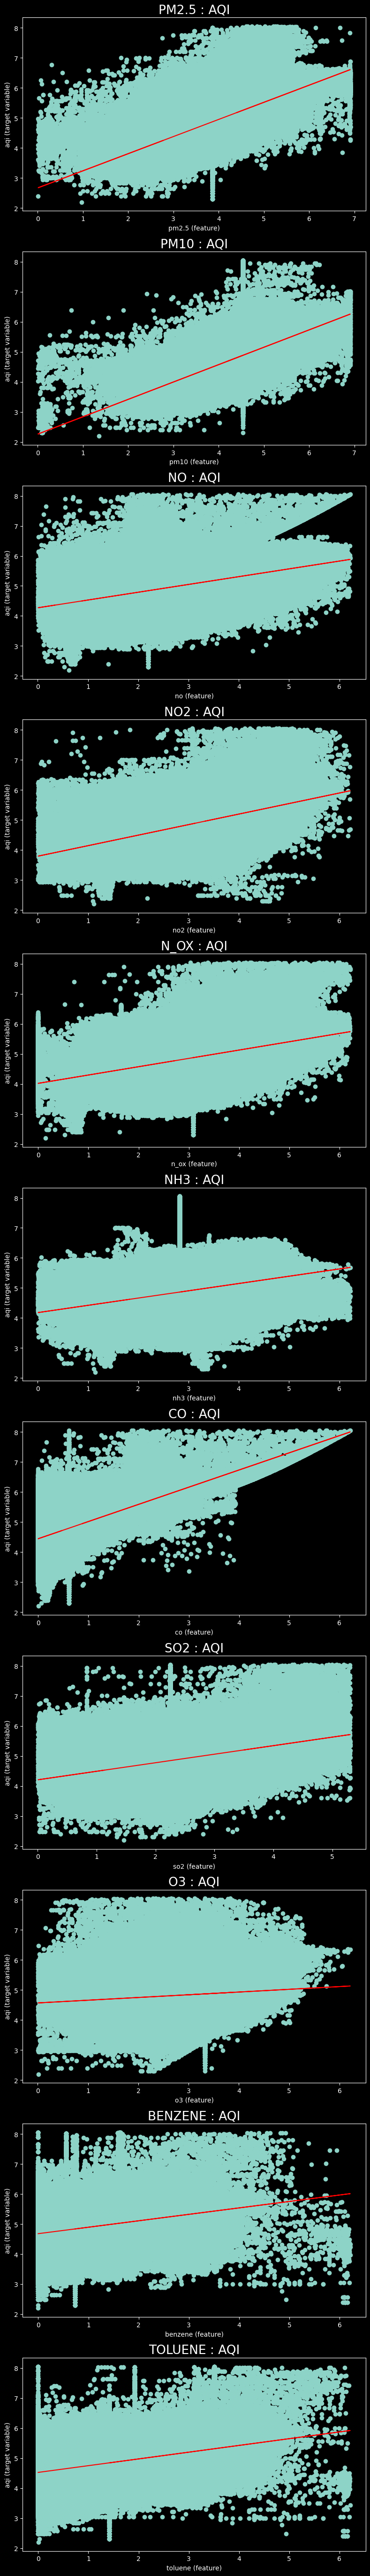

In [9]:
_, ax = plt.subplots(
    len(numerical_variables.columns),
    1,
    figsize=(8, 5 * len(numerical_variables.columns)),
)

for i, column in enumerate(numerical_variables.columns):
    ax[i].scatter(x=df[column], y=df["aqi"])
    ax[i].set_title(f"{column.upper()} : AQI", fontsize=19)

    slope, intercept = np.polyfit(df[column], df["aqi"], 1)
    line = slope * df[column] + intercept

    ax[i].plot(df[column], line, color="red")

    ax[i].set_xlabel(f"{column} (feature)")
    ax[i].set_ylabel("aqi (target variable)")

plt.tight_layout()
plt.show()

- **Almost all feature have positive correalation with target variable**

### ***Categorical Varibale Analysis***

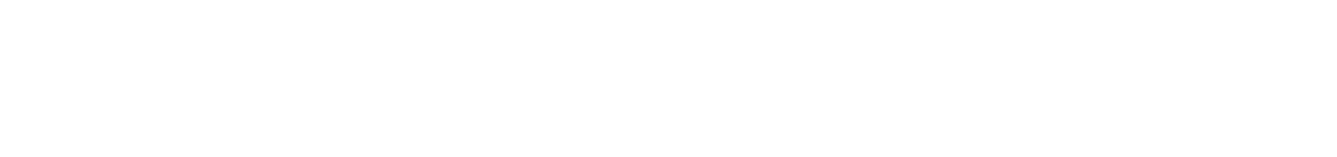

In [16]:
plt.figure(figsize=(16, 6j))
sns.boxplot(x=df["city"], y=df["aqi"], palette="Set2")
plt.title("CITY : AQI")
plt.xlabel("Cities")
plt.xticks(rotation=30)
plt.show()

## ***Multi-Variate Analysis***

### ***Correlation Analysis***

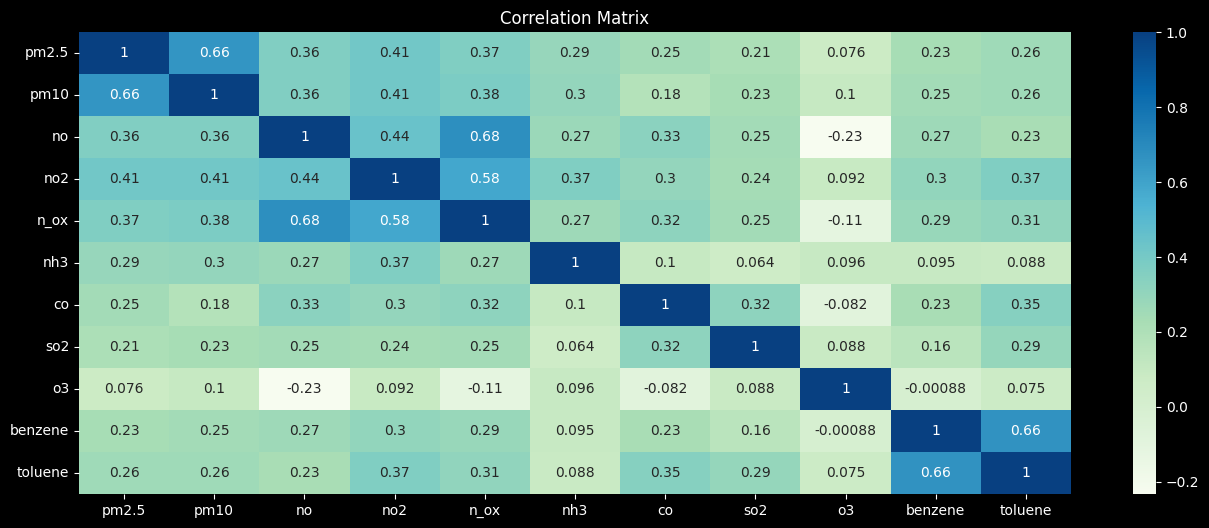

In [17]:
plt.figure(figsize=(16, 6))
sns.color_palette("rocket", as_cmap=True)
corr = numerical_variables.corr()
sns.heatmap(corr, annot=True, cmap="GnBu")
plt.title("Correlation Matrix")
plt.show()

### **EDA REPORT**

- All Numeric variable follows normal distribution.
- Most of all feature are keep average correlation with target.


**High Correlation with:**
|     |          | |
|--------|-----------------|--------------|
|**pm10**    | **pm2.5**           | **0.65**         |
|**no**      | **n_ox**            | **0.68**         |
|**no2**     | **n_ox**            | **0.58**         |
|**benzene** | **tolune**          | **0.66**         |

### **Next: Preprocessing**